<a href="https://colab.research.google.com/github/vtecftwy/fastbook/blob/walk-thru/04_mnist_full_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Full Dataset
Model to classify MNIST for unpackAI Bootcamp 2: first session

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.5MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
     |████████████████████████████████| 194kB 57.9MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Load MNIST data and create dataloaders

In [3]:
path = untar_data(URLs.MNIST)
path.ls(),  (path/'training').ls(), (path/'testing').ls()

((#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')],
 (#10) [Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/4')],
 (#10) [Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/0'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/m

Folder structure: 
- `training\0`: all images of 0
- `training\1`: all images of 1
- . . . 
- `training\9`: all images of 9
- `testing\0`: all images of 0
- `testing\1`: all images of 1
- . . . 
- `testing\9`: all images of 9

Elements to create the DataBlocks:
- `blocks`: 
    - `ImageBlock`. But MNIST images are BW, so we also pass the cls `PILImageBW`
    - `CategoryBlock`
- `get_items`: `get_image_files` method to get the list of all image files in the folder
- `get_y`: `parent_label` as images are grouped be folder/category
- `splitter`: `RamdomSplitter` because this dataset only includes a training folder and a testing folder, no validation folder.

In [7]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(seed=1988)
                   )

In [8]:
dls = dblock.dataloaders(path/'training', bs=256)

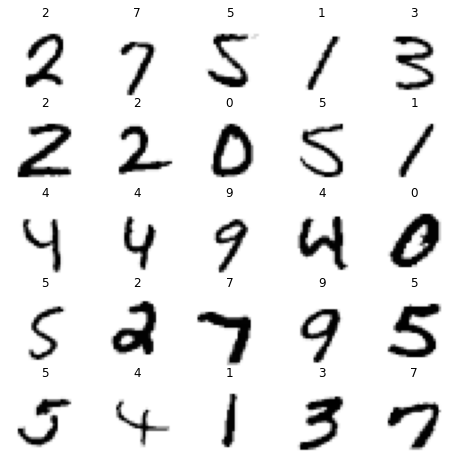

In [9]:
dls.show_batch(max_n=25, figsize=(8,8))

In [10]:
dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
# dblock.summary(path)

Testset dataloader

In [ ]:
test_dls = dblock.dataloaders(path/'testing')
test_dl = dls.test_dl(test_items=test_dls.items, with_labels=True)

In [ ]:
test_dls.show_batch(max_n=25, figsize=(8,8))

## Resnet 18  Pretrained

In [13]:
precision = Precision(average='macro')
recall = Recall(average='macro')

learn_18 = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy, precision, recall], pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.009120108559727669)

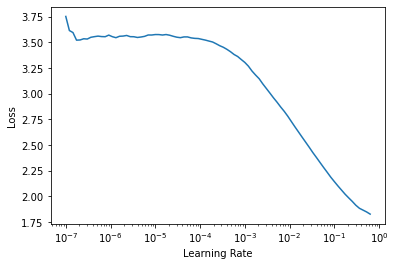

In [14]:
learn_18.lr_find()

In [ ]:
n = 8
lr = 1e-2
learn_18.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.409579,0.171444,0.051917,0.948083,0.947772,0.947966,00:52
1,0.138568,0.140069,0.040583,0.959417,0.960020,0.959577,00:51
2,0.093107,0.151755,0.041333,0.958667,0.959541,0.959296,00:50
3,0.070350,0.068100,0.017750,0.982250,0.982272,0.982171,00:50
4,0.053668,0.054839,0.014417,0.985583,0.985631,0.985578,00:49
5,0.035598,0.040150,0.010917,0.989083,0.989159,0.989073,00:49
6,0.025495,0.040677,0.010167,0.989833,0.989855,0.989753,00:49
7,0.015215,0.040784,0.009500,0.990500,0.990497,0.990430,00:50


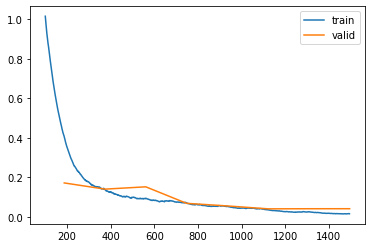

In [ ]:
learn_18.recorder.plot_loss(skip_start=100)

In [ ]:
learn_18.validate(dl=test_dl)

(#5) [0.026596538722515106,0.008124999701976776,0.9918749928474426,0.9918806682284032,0.991857293525882]

| Metric | Value |
|--------|-----:|
| Error Rate | 0.008125 |
| Accuracy |0.991875|
| Precision | 0.991881|
| Recall | 0.991857|

## Resnet 18  Untrained

In [15]:
learn_18_unt = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy, precision, recall], pretrained=False)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0004786300996784121)

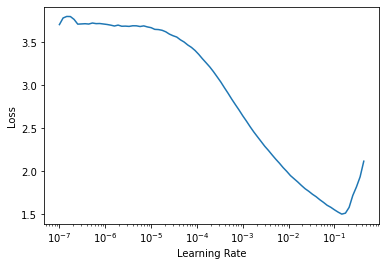

In [16]:
learn_18_unt.lr_find()

In [17]:
n = 8
lr = 1e-3
learn_18_unt.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.281269,0.156072,0.046917,0.953083,0.954461,0.952646,00:51
1,0.112043,0.075744,0.022583,0.977417,0.977428,0.976989,00:51
2,0.078653,0.052826,0.014917,0.985083,0.985192,0.984778,00:51
3,0.060607,0.056665,0.015250,0.984750,0.985066,0.984336,00:51
4,0.042045,0.054098,0.015417,0.984583,0.984736,0.984505,00:51
5,0.027003,0.040291,0.010500,0.989500,0.989536,0.989372,00:51
6,0.011142,0.029470,0.007417,0.992583,0.992556,0.992548,00:51
7,0.005596,0.028730,0.007167,0.992833,0.992806,0.992759,00:51


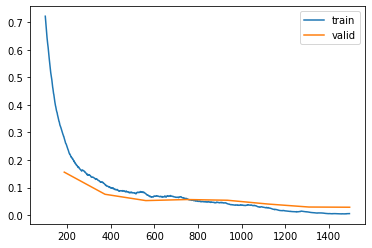

In [18]:
learn_18_unt.recorder.plot_loss(skip_start=100)

In [21]:
learn_18_unt.validate(dl=test_dl)

(#5) [0.019653407856822014,0.006750000175088644,0.9932500123977661,0.9932891450394876,0.9931776971926778]

| Metric | Value |
|--------|-----:|
| Error Rate | 0.0067500
| Accuracy | 0.9932500
| Precision | 0.9932891
| Recall | 0.9931777

## Resnet 34 Pretrained

In [ ]:
learn_34 = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy, precision, recall], pretrained=True)

SuggestedLRs(lr_min=0.04365158379077912, lr_steep=0.013182567432522774)

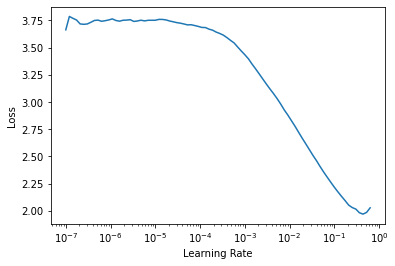

In [ ]:
learn_34.lr_find()

In [ ]:
n = 8
lr = 1e-2
learn_34.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.368139,0.167955,0.050250,0.949750,0.950084,0.949740,00:56
1,0.127198,0.129974,0.037500,0.962500,0.964245,0.961122,00:55
2,0.089532,0.125045,0.034750,0.965250,0.966986,0.964015,00:56
3,0.068741,0.072835,0.021833,0.978167,0.978542,0.978169,00:55
4,0.048072,0.049588,0.013083,0.986917,0.987393,0.986802,00:56
5,0.031072,0.038731,0.009083,0.990917,0.991010,0.990727,00:56
6,0.017881,0.031832,0.007750,0.992250,0.992271,0.992135,00:56
7,0.011673,0.030884,0.007167,0.992833,0.992831,0.992728,00:55


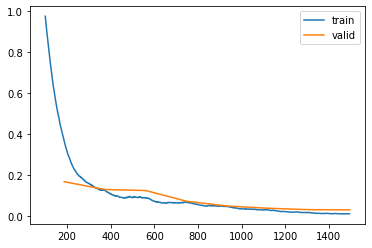

In [ ]:
learn_34.recorder.plot_loss(skip_start=100)

In [ ]:
learn_34.validate(dl=test_dl)

(#5) [0.021880125626921654,0.00787500012665987,0.9921249747276306,0.9921124563875956,0.9920476920599901]

| Metric | Value |
|--------|-----:|
| Error Rate | 0.00787500
| Accuracy | 0.99212497
| Precision | 0.99211246
| Recall | 0.99204769

In [ ]:
learn_34.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=3.981071586167673e-06)

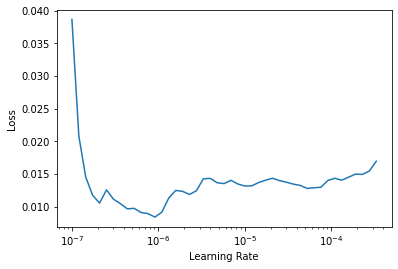

In [ ]:
learn_34.lr_find()

In [ ]:
n = 10
lr = 5e-7
learn_34.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.009512,0.030438,0.006917,0.993083,0.993099,0.992969,01:00
1,0.009969,0.030400,0.007333,0.992667,0.992706,0.992521,00:58
2,0.010843,0.030063,0.006833,0.993167,0.993175,0.993063,00:59
3,0.009818,0.030025,0.007000,0.993000,0.993010,0.992887,00:59
4,0.008848,0.030471,0.007083,0.992917,0.992932,0.992816,00:59
5,0.008581,0.030649,0.007250,0.992750,0.992786,0.992606,00:58
6,0.008628,0.030191,0.007250,0.992750,0.992784,0.992632,00:59
7,0.008571,0.030379,0.006833,0.993167,0.993189,0.993030,00:59
8,0.007604,0.030400,0.007083,0.992917,0.992955,0.992764,00:59
9,0.009241,0.030837,0.006917,0.993083,0.993147,0.992917,00:58


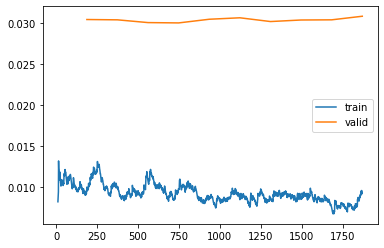

In [ ]:
learn_34.recorder.plot_loss(skip_start=10)

In [ ]:
learn_34.validate(dl=test_dl)

(#5) [0.020970115438103676,0.007249999791383743,0.9927499890327454,0.992786805523178,0.9926656570580338]

| Metric | Value |
|--------|-----:|
| Error Rate | 0.00787500
| Accuracy | 0.99212497
| Precision | 0.99211246
| Recall | 0.99204769

## Resnet 34 Untrained

In [22]:
learn_34_unt = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy, precision, recall], pretrained=False)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0003311311302240938)

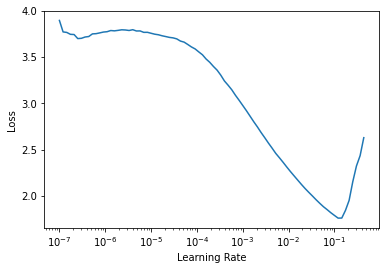

In [23]:
learn_34_unt.lr_find()

In [32]:
n = 8
lr = 2e-3
learn_34_unt.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.039619,0.112828,0.030000,0.970000,0.971269,0.970083,00:55
1,0.064647,0.080043,0.021500,0.978500,0.978347,0.978670,00:55
2,0.047435,0.054005,0.014250,0.985750,0.985919,0.985624,00:55
3,0.039049,0.062228,0.014083,0.985917,0.986261,0.985824,00:55
4,0.022147,0.028577,0.007667,0.992333,0.992278,0.992295,00:55
5,0.011803,0.025830,0.006583,0.993417,0.993452,0.993354,00:55
6,0.006023,0.026232,0.005667,0.994333,0.994374,0.994267,00:55
7,0.002737,0.024292,0.005583,0.994417,0.994437,0.994346,00:55


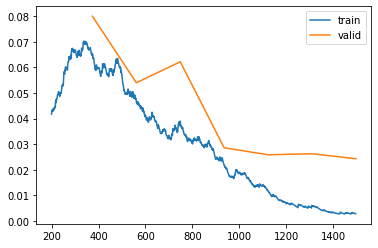

In [35]:
learn_34_unt.recorder.plot_loss(skip_start=200)

In [36]:
learn_34_unt.validate(dl=test_dl)

(#5) [0.017303118482232094,0.005249999929219484,0.9947500228881836,0.9947785756690903,0.9947455574418097]

| Metric | Value |
|--------|-----:|
| Error Rate | 0.005250
| Accuracy | 0.994750
| Precision | 0.994779
| Recall | 0.994746

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=1.5848931980144698e-06)

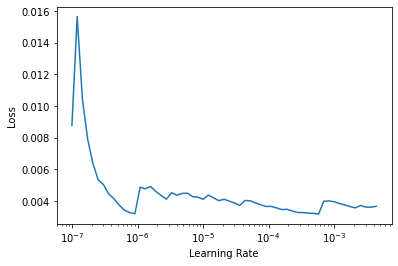

In [38]:
learn_34_unt.lr_find()

In [ ]:
n = 8
lr = 1e-6
learn_34_unt.fit_one_cycle(n_epoch=n, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.002605,0.024234,0.005583,0.994417,0.994411,0.994373,00:56
